In [192]:
from typing import TypeVar, Tuple,  List, Iterator, Optional
import json
import string
import math

## PriorityQueue

In [193]:
import heapq
T = TypeVar('T')
class PriorityQueue:
    def __init__(self):
        self.elements: list[tuple[float, T]] = []

    def empty(self) -> bool:
        return  not self.elements

    def put(self, item: T, priority: float):
        heapq.heappush(self.elements, (priority, item))

    def get(self) -> T:
        return heapq.heappop(self.elements)[1]

## Graph

In [194]:
GridLocation = Tuple[int, int]
class Graph:
    def __init__(self, graph_data: List[ List[int] ], heuristic_type: int):
        # Remember the graph_data and heuristic
        self.graph_data = graph_data
        self.heuristic_type = heuristic_type
        self.width = len(graph_data[0])
        self.height = len(graph_data)

        self.maxheight = self.graph_data[0][0]
        self.minheight = self.graph_data[0][0]
        for i in range(self.height):
            for j in range(self.width):
                self.maxheight = max(self.maxheight, self.graph_data[i][j])
                self.minheight = min(self.minheight, self.graph_data[i][j])


    def in_bounds(self, id: GridLocation) -> bool:
        (x, y) = id
        return 0 <= x < self.width and 0 <= y < self.height


    def neighbours(self, id: GridLocation) -> Iterator[GridLocation]:
        (x, y) = id
        neighbors = [(x + 1, y), (x, y + 1), (x - 1, y), (x, y - 1)]
        return filter(self.in_bounds, neighbors)

    def edge_length(self, from_id: GridLocation, to_id: GridLocation) -> float:
        (x1, y1) = from_id
        (x2, y2) = to_id
        return 1 + (self.graph_data[x1][y1] - self.graph_data[x2][y2])*(self.graph_data[x1][y1] - self.graph_data[x2][y2])


    def heuristic(self, from_id: GridLocation, to_id: GridLocation) -> float:
        (x1, y1) = from_id
        (x2, y2) = to_id
        mincost: float = abs(x1 - x2) + abs(y1 - y2);
        maxcost: float = (abs(x1 - x2) + abs(y1 - y2)) * (1 + (self.maxheight - self.minheight) * (self.maxheight - self.minheight));
        match self.heuristic_type:
            case 0:
                # “as the crow flies"
                return math.sqrt( abs(x1 - x2) * abs(x1 - x2) + abs(y1 - y2) * abs(y1 - y2))
            case _:
                return (self.heuristic_type * 1.0 / 1000)*(maxcost - mincost) + mincost

## reconstruct_path

In [195]:
def reconstruct_path(came_from: dict[GridLocation, Optional[GridLocation]], start_node: GridLocation, end_node: GridLocation) -> List[GridLocation]:
    path: List[GridLocation] =[]

    if end_node not in came_from:
        print("there is no path exits !")
        return []

    current: GridLocation = end_node

    while current != start_node:
        path.append(current)
        current = came_from[current]

    path.append(start_node)
    path.reverse()

    return path



## find_shortest_path
using $A^* search$

In [196]:
def find_shortest_path(graph: Graph, start_node: GridLocation, end_node: GridLocation):
    frontier = PriorityQueue()
    frontier.put(start_node, 0)
    # Since dict[star_tnode] = None, we have to add "Optional"
    came_from: dict[GridLocation, Optional[GridLocation]] = {}
    cost_so_far: dict[GridLocation, float] = {}
    came_from[start_node] = None
    cost_so_far[start_node] = 0

    while not frontier.empty():
        current: GridLocation = frontier.get()
        if current == end_node:
            break
        for next in graph.neighbours(current):
            new_cost: float = cost_so_far[current] + graph.edge_length(current,next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority: float = new_cost + graph.heuristic(next, end_node)
                frontier.put(next, priority)
                came_from[next] = current

    path = reconstruct_path(came_from, start_node, end_node)

    return {
                'path': path,
                'vertex': len(path),
                'explored': len(came_from),
                "distance": cost_so_far[end_node]
           }

## print_path

In [197]:
# Function to print the path.
# Uses letters a-z for height, A-Z for height on the path.
def print_path(data, path):
    for i in range(len(data)):
        for j in range(len(data[i])):
            if (i,j) in path:
                print(string.ascii_uppercase[data[i][j]],end="")
            else:
                print(string.ascii_lowercase[data[i][j]],end="")
        print("")

## plot

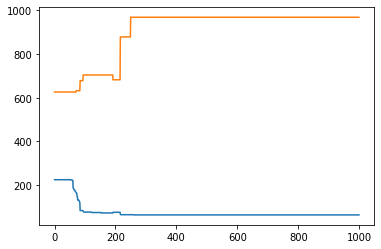

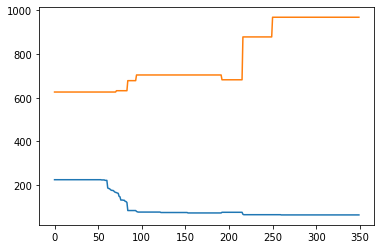

In [198]:
import matplotlib.pyplot as plt
filename = "mountains15.json"
with open(filename) as f:
    data = json.load(f)

explored = []
length = []

for i in range(1000):
    heuristic_type = i
    startnode = (0,0)
    endnode = (len(data)-1, len(data[0])-1)
    graph = Graph(data, heuristic_type)
    output = find_shortest_path(graph, startnode, endnode)
    explored.append(output['explored'])
    length.append(output['distance'])

fig = plt.figure(num = 1, figsize = (6,4))
plt.plot(range(1000),explored)
plt.plot(range(1000),length)

plt.show()

fig_detail = plt.figure(num = 1, figsize = (6,4))
plt.plot(range(350),explored[:350])
plt.plot(range(350),length[:350])

plt.show()

